<h4> Name: Jasmeet Narang <br>
    <br> Title: Eluvio Challenge <br>
    <br>Description: Prediction the votes given to each title using regression and neural networks <br>
    </h4>

## Eluvio Challenge

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import models
from keras import layers
from keras import optimizers
import matplotlib.pyplot as plt
from keras.models import load_model
import os

In [5]:
os.mkdir('models')

#### 1. Read the file to dataframe and extract the useful feature(title) and label

In [13]:
# using title as the feature and predicting up_votes 
data = pd.read_csv("/kaggle/input/eluvio-ds-challengecsv/Eluvio_DS_Challenge.csv")
features = data['title']
label = data['up_votes']
label = label/1000

In [14]:
print(features.head())
print(label.head())
print(max(label))

0                  Scores killed in Pakistan clashes
1                   Japan resumes refuelling mission
2                    US presses Egypt on Gaza border
3       Jump-start economy: Give health care to all 
4    Council of Europe bashes EU&UN terror blacklist
Name: title, dtype: object
0    0.003
1    0.002
2    0.003
3    0.001
4    0.004
Name: up_votes, dtype: float64
21.253


In [15]:
print(label/1000)

0         0.000003
1         0.000002
2         0.000003
3         0.000001
4         0.000004
            ...   
509231    0.000005
509232    0.000001
509233    0.000001
509234    0.000001
509235    0.000001
Name: up_votes, Length: 509236, dtype: float64


#### 2. Splitting the data into train and test 

In [16]:
train_features, test_features, train_label, test_label = train_test_split(features, label, test_size=0.2)

In [17]:
print("shape: ",train_features.shape)

shape:  (407388,)


#### 3. Tokenizing feature

In [18]:
max_words = 1000
max_length = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_features)

train_features = tokenizer.texts_to_sequences(train_features)
test_features = tokenizer.texts_to_sequences(test_features)

train_features = pad_sequences(train_features, maxlen= max_length)
test_features = pad_sequences(test_features, maxlen= max_length)


#### 5. splitting train data into train and validation and changing them to numpy arrays

In [19]:
val_features = np.asarray(train_features[:100000])
partial_train_features = np.asarray(train_features[100000:])
val_label = np.asarray(train_label[:100000])
partial_train_label = np.asarray(train_label[100000:])

In [20]:
print("shape: ", val_features.shape)
print("train shape: ", partial_train_features.shape)

shape:  (100000, 100)
train shape:  (307388, 100)


#### 6. create a model

In [21]:
# using lstm layers
input_shape = partial_train_features[1].shape[0]
print("input: ", input_shape)

def model():
    model = models.Sequential()

    model.add(layers.Embedding(max_words, input_shape, input_length=max_length))
    # model.add(layers.Flatten())
    model.add(layers.LSTM(128, return_sequences=True))
    model.add(layers.Dropout(0.5))
    model.add(layers.LSTM(64, return_sequences=True))
    # model.add(layers.SimpleRNN(64))
    model.add(layers.Dense(1))
    model.add(layers.Activation('linear'))

    adam = optimizers.Adam()
    model.compile(
        optimizer=adam,
        loss='huber_loss',
        metrics=['mae']
    )

    return model


input:  100


In [22]:
model = model()

In [24]:
# runiing for 30 epoch as the data starts to overfit after 30
history = model.fit(partial_train_features, partial_train_label,
                    epochs = 30,
                    batch_size=128,
                    validation_data=(val_features,val_label))

Epoch 1/30
2402/2402 [==============================] - 57s 22ms/step - loss: 0.0698 - mae: 0.1463 - val_loss: 0.0694 - val_mae: 0.1451
Epoch 2/30
2402/2402 [==============================] - 51s 21ms/step - loss: 0.0689 - mae: 0.1451 - val_loss: 0.0693 - val_mae: 0.1478
Epoch 3/30
2402/2402 [==============================] - 51s 21ms/step - loss: 0.0678 - mae: 0.1443 - val_loss: 0.0693 - val_mae: 0.1458
Epoch 4/30
2402/2402 [==============================] - 52s 22ms/step - loss: 0.0684 - mae: 0.1448 - val_loss: 0.0693 - val_mae: 0.1486
Epoch 5/30
2402/2402 [==============================] - 51s 21ms/step - loss: 0.0683 - mae: 0.1448 - val_loss: 0.0693 - val_mae: 0.1443
Epoch 6/30
2402/2402 [==============================] - 51s 21ms/step - loss: 0.0686 - mae: 0.1450 - val_loss: 0.0694 - val_mae: 0.1447
Epoch 7/30
2402/2402 [==============================] - 51s 21ms/step - loss: 0.0697 - mae: 0.1462 - val_loss: 0.0695 - val_mae: 0.1430
Epoch 8/30
2402/2402 [==========================

In [26]:
print("his: ",history.history)

his:  {'loss': [0.06898870319128036, 0.06892646104097366, 0.06890368461608887, 0.06887779384851456, 0.06885795295238495, 0.06882718205451965, 0.06878641992807388, 0.06874286383390427, 0.06869447976350784, 0.06864012777805328, 0.06858985871076584, 0.06852623075246811, 0.06847090274095535, 0.06841103732585907, 0.06835482269525528, 0.06828523427248001, 0.06820783019065857, 0.06813786178827286, 0.0680542066693306, 0.0680055245757103, 0.06792598217725754, 0.06784460693597794, 0.06780029088258743, 0.06771250069141388, 0.06765962392091751, 0.06759944558143616, 0.06753470003604889, 0.06748580932617188, 0.06740903854370117, 0.06737001985311508], 'mae': [0.14554975926876068, 0.14551900327205658, 0.14550283551216125, 0.14545390009880066, 0.14547541737556458, 0.14534208178520203, 0.14533591270446777, 0.14523662626743317, 0.14513185620307922, 0.14511196315288544, 0.14501748979091644, 0.14492706954479218, 0.1448754519224167, 0.14476783573627472, 0.14473029971122742, 0.14465941488742828, 0.1445295363

#### 7. Saving models

In [25]:
print("saving model .....")
model.save("models/model30.h5")
print("... saved model")

saving model .....
... saved model


#### 8. Plotting mae to analyze the model fitting

In [27]:
mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(mae) + 1)


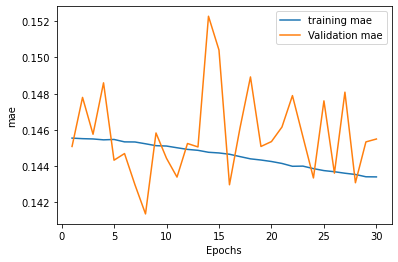

<Figure size 432x288 with 0 Axes>

In [28]:
#Validation vs Training in mae
plt.plot(epochs,mae,label='training mae')
plt.plot(epochs,val_mae,label='Validation mae')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.figure()

plt.show()


#### 9. Loading the model

In [29]:
print("loading model .....")
loaded_model = load_model("models/model30.h5")
print("... loaded model")

loading model .....
... loaded model


#### 10. Evaluating the test features

In [33]:
# testing on the test data gave mae of approx 14%
result = model.evaluate(test_features, test_label)
print("Test MAE:", result[1]*100)

3183/3183 [==============================] - 20s 6ms/step - loss: 0.0701 - mae: 0.1459
Test MAE: 14.587059617042542


#### 11. Predicting the test labels

In [31]:
y_pred = model.predict(test_features)
print(y_pred)

[[[0.06408936]
  [0.06187725]
  [0.06101802]
  ...
  [0.05401684]
  [0.05662075]
  [0.06685917]]

 [[0.06408936]
  [0.06187725]
  [0.06101802]
  ...
  [0.03917871]
  [0.02663022]
  [0.02749212]]

 [[0.06408936]
  [0.06187725]
  [0.06101802]
  ...
  [0.06424742]
  [0.05287088]
  [0.05523493]]

 ...

 [[0.06408936]
  [0.06187725]
  [0.06101802]
  ...
  [0.08349053]
  [0.06829972]
  [0.07383139]]

 [[0.06408936]
  [0.06187725]
  [0.06101802]
  ...
  [0.08113129]
  [0.04897392]
  [0.06410982]]

 [[0.06408936]
  [0.06187725]
  [0.06101802]
  ...
  [0.10380103]
  [0.10620406]
  [0.10536194]]]


#### 12. Saving the prediction in a file

In [32]:
file = open('prediction.txt','w')
for row in y_pred*1000:
    np.savetxt(file,row)

file.close()

#### 